# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress  #if I want to call linregress all I need to do is type "linregress"
#import scipy.stats as st           #if I want to call linregress then I need to call "st.linregress"

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
cities_list = []
temp = []
lon = []
humidity = []
clouds =[]
wind = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    
    try:
        response = requests.get(query_url + city).json()
        
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_list.append (city)
        print(city + ' found')
    except: 
        print(city + ' not found')
        

      
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities_list,
    "lat": lat,
    "lon": lon,
    "humidity": humidity,
    "wind": wind,
    "clouds": clouds,
    "country": country,
    "date": date,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

ancud found
borba found
honningsvag found
mataura found
venice found
esperance found
bluff found
araouane found
rio grande found
hermanus found
rikitea found
houston found
port hardy found
ushuaia found
punta arenas found
carutapera found
qaanaaq found
severo-kurilsk found
hilo found
thompson found
vaini found
edgecumbe found
mar del plata found
najran found
itarema found
binga found
lobva found
buraydah found
roald found
torbay found
ponta delgada found
marcona not found
jamestown found
new norfolk found
port elizabeth found
te anau found
hobart found
albany found
mys shmidta not found
longyearbyen found
iquique found
nikolskoye found
marawi found
kerman found
taolanaro not found
mount isa found
flinders found
mahebourg found
lebu found
la ronge found
nathdwara found
birao found
port macquarie found
avarua found
busselton found
vila franca do campo found
comodoro rivadavia found
leningradskiy found
arraial do cabo found
tuktoyaktuk found
venray found
barra do garcas found
bredasdorp f

,city,lat,lon,humidity,wind,clouds,country,date,temp
0,ancud,-41.87,-73.82,87,12.75,40,CL,1595627815,46.99
1,borba,-4.39,-59.59,62,0.63,68,BR,1595627816,83.46
2,honningsvag,70.98,25.97,93,4.70,7,NO,1595627612,55.40
3,mataura,-46.19,168.86,88,5.70,95,NZ,1595627531,44.83
4,venice,27.10,-82.45,70,9.17,20,US,1595627802,87.01
...,...,...,...,...,...,...,...,...,...
553,bandarbeyla,9.49,50.81,81,28.97,3,SO,1595627904,75.49
554,aksarka,66.56,67.80,90,7.14,2,RU,1595627905,49.53
555,rio cuarto,-33.13,-64.35,20,14.99,0,AR,1595627905,55.40
556,san benito,16.91,-89.91,50,2.89,97,GT,1595627905,92.34


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data.to_csv("weather.csv")
weather_data.head()


,city,lat,lon,humidity,wind,clouds,country,date,temp
0,ancud,-41.87,-73.82,87,12.75,40,CL,1595627815,46.99
1,borba,-4.39,-59.59,62,0.63,68,BR,1595627816,83.46
2,honningsvag,70.98,25.97,93,4.70,7,NO,1595627612,55.40
3,mataura,-46.19,168.86,88,5.70,95,NZ,1595627531,44.83
4,venice,27.10,-82.45,70,9.17,20,US,1595627802,87.01


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data.describe()

,lat,lon,humidity,wind,clouds,date,temp
count,558.00000,558.000000,558.000000,558.000000,558.000000,5.580000e+02,558.000000
mean,20.89871,18.469731,70.397849,7.772939,48.541219,1.595628e+09,68.857384
std,33.04948,89.310928,19.830959,5.159512,38.217476,1.588344e+02,14.041564
min,-54.80000,-175.200000,10.000000,0.110000,0.000000,1.595627e+09,32.000000
25%,-3.51250,-59.572500,57.000000,4.017500,7.250000,1.595628e+09,57.380000
50%,25.31500,24.515000,75.000000,6.860000,42.000000,1.595628e+09,70.115000
75%,48.00000,95.182500,86.000000,10.470000,90.000000,1.595628e+09,79.455000
max,78.22000,179.320000,100.000000,29.970000,100.000000,1.595628e+09,102.830000


In [17]:
#  Get the indices of cities that have humidity over 100%.
# NA

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# NA

In [7]:
# Extract relevant fields from the data frame
weather2_df = weather_data[["city", "lat", "humidity", "temp", "wind", "clouds", "wind"]]


# Export the City_Data into a csv
weather2_df.to_csv("city.csv", index=False)
weather2_df.head()

,city,lat,humidity,temp,wind,clouds,wind
0,ancud,-41.87,87,46.99,12.75,40,12.75
1,borba,-4.39,62,83.46,0.63,68,0.63
2,honningsvag,70.98,93,55.40,4.70,7,4.70
3,mataura,-46.19,88,44.83,5.70,95,5.70
4,venice,27.10,70,87.01,9.17,20,9.17


In [ ]:
# Extract revalent fields from the data frame

# lat = []
# cities_list = []
# temp = []
# lon = []
# humidity = []
# clouds =[]
# wind = []
# country = []
# date = []


In [8]:
latitude = weather2_df["lat"]
latitude

0     -41.87
1      -4.39
2      70.98
3     -46.19
4      27.10
       ...  
553     9.49
554    66.56
555   -33.13
556    16.91
557   -34.05
Name: lat, Length: 558, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

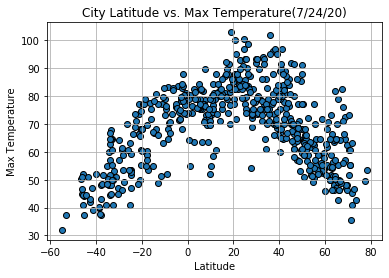

In [12]:

plt.scatter(lat, temp, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature(7/24/20)')
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

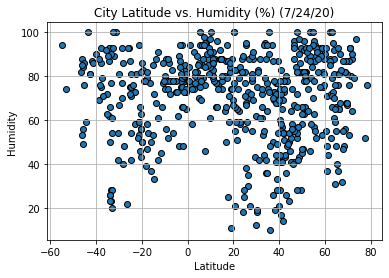

In [15]:

plt.scatter(lat, humidity, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%) (7/24/20)')
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

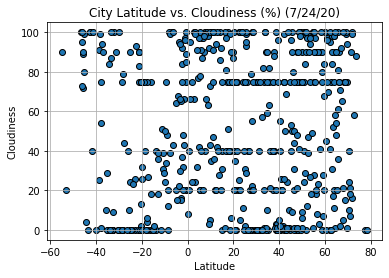

In [16]:

plt.scatter(lat, clouds, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (%) (7/24/20)')
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

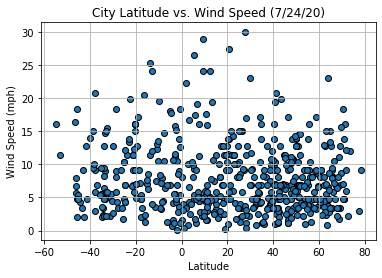

In [18]:
plt.scatter(lat, wind, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (7/24/20)')
plt.grid(True)
plt.show()

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots


In [31]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[weather_data["lat"]>0]
southern_df = weather_data.loc[weather_data["lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
northern_df = weather_data.loc[weather_data["lat"]>0]
northern_df.head()

,city,lat,lon,humidity,wind,clouds,country,date,temp
2,honningsvag,70.98,25.97,93,4.70,7,NO,1595627612,55.40
4,venice,27.10,-82.45,70,9.17,20,US,1595627802,87.01
7,araouane,18.90,-3.53,11,0.20,6,ML,1595627637,102.83
11,houston,29.76,-95.36,62,23.04,75,US,1595627066,91.99
12,port hardy,50.70,-127.42,63,12.75,40,CA,1595627455,64.40


The r-squared is: 0.36559559959943716


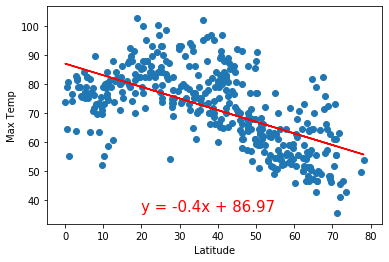

In [25]:
northern_df = weather_data.loc[weather_data["lat"]>0]
southern_df = weather_data.loc[weather_data["lat"]<0]

# plt.scatter(northern_df.iloc[:,1], northern_df.iloc[:,8])
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.show()


# Add x and y values to Linregress; it calculates slope, intercept, rvalue, pvalue, and standard deviation and stores these in those variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df.iloc[:,1], northern_df.iloc[:,8])

# This is y=mx+b; we put in the xvalues as a list and it calculates each corresponding y value by using y=mx+b
# regress_values is a list of y values
regress_values = northern_df.iloc[:,1] * slope + intercept

# Generate line equation for plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Add line equation to plot
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

#Add line graph of regression line to plot
plt.plot(northern_df.iloc[:,1],regress_values,"r-")

#Add scatter plot to plot
plt.scatter(northern_df.iloc[:,1], northern_df.iloc[:,8])


#Add plot labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")



#Show both scatter and line plots
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6853949706685042


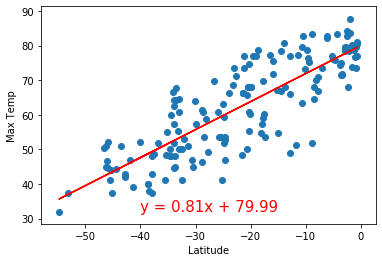

In [28]:
# Add x and y values to Linregress; it calculates slope, intercept, rvalue, pvalue, and standard deviation and stores these in those variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df.iloc[:,1], southern_df.iloc[:,8])

# This is y=mx+b; we put in the xvalues as a list and it calculates each corresponding y value by using y=mx+b
# regress_values is a list of y values
regress_values = southern_df.iloc[:,1] * slope + intercept

# Generate line equation for plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Add line equation to plot
plt.annotate(line_eq,(-40,32),fontsize=15,color="red")

#Add line graph of regression line to plot
plt.plot(southern_df.iloc[:,1],regress_values,"r-")

#Add scatter plot to plot
plt.scatter(southern_df.iloc[:,1], southern_df.iloc[:,8])


#Add plot labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")



#Show both scatter and line plots
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


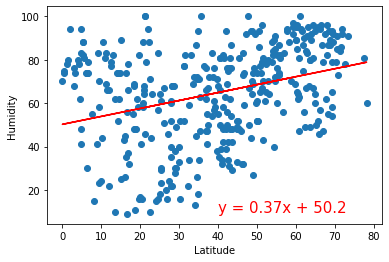

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


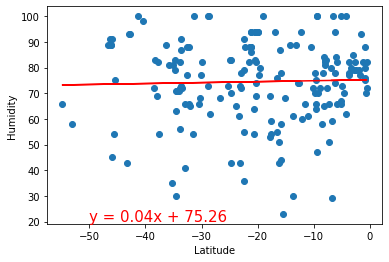

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


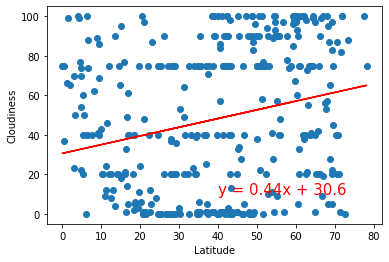

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


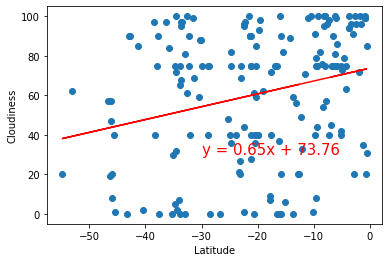

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


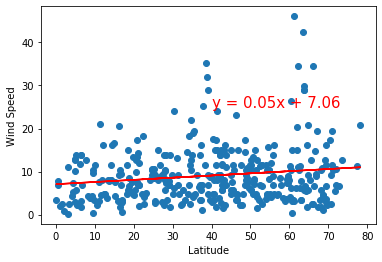

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


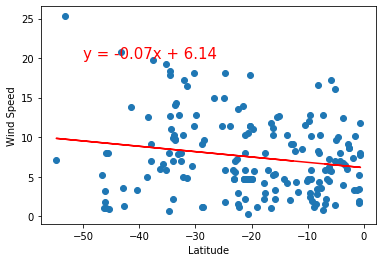